# Google Data Analysis

In [5]:
pip install pytrends

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup pytrends library and keyword define

In [22]:
pytrends=TrendReq(hl='en-US',tz=360)
#keyword='cloud computing'
keyword='Artificial Intelligence'

# Data Request

In [23]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

# Country wise interest

In [25]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3848\2408074917.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




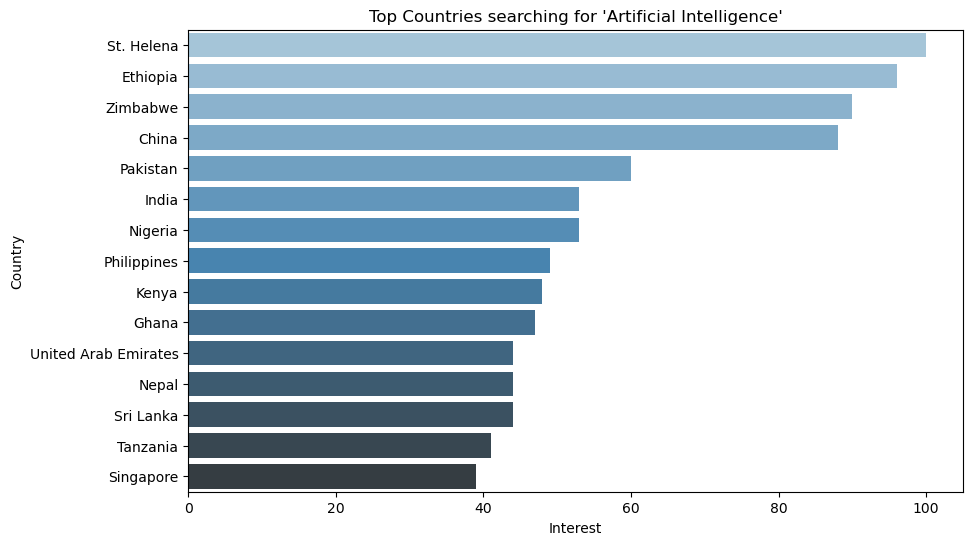

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

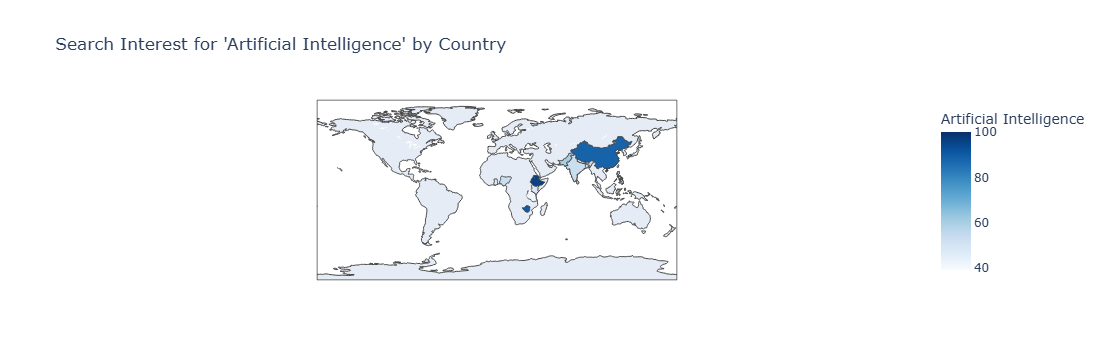

In [27]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                  locations='geoName',
                  locationmode='country names',
                  color=keyword,
                  title=f"Search Interest for '{keyword}' by Country",
                  color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [28]:
time_df=pytrends.interest_over_time()

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



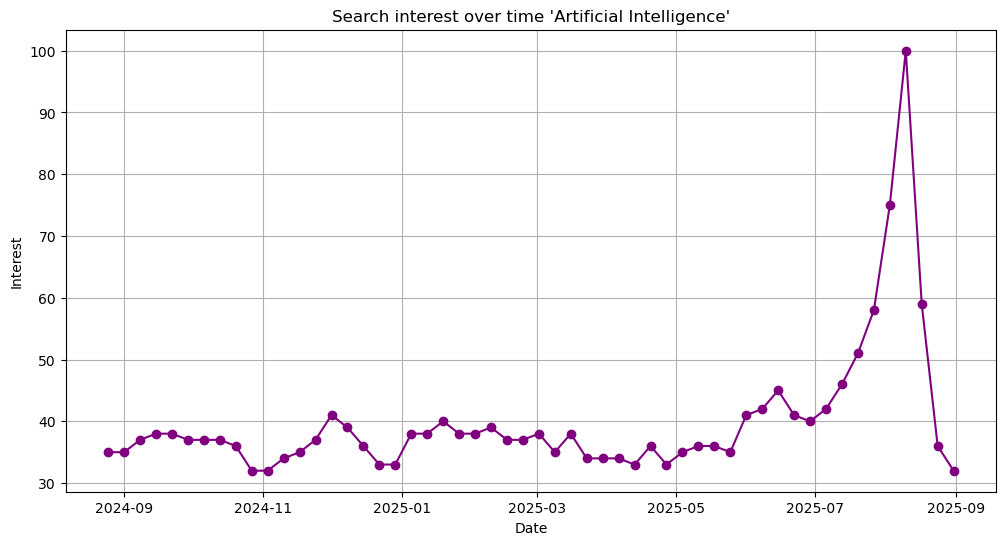

In [29]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"Search interest over time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keyword campare

In [30]:
kw_list=["Artificial Intelligence","cloud computing","Data science","Machine learning"]
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



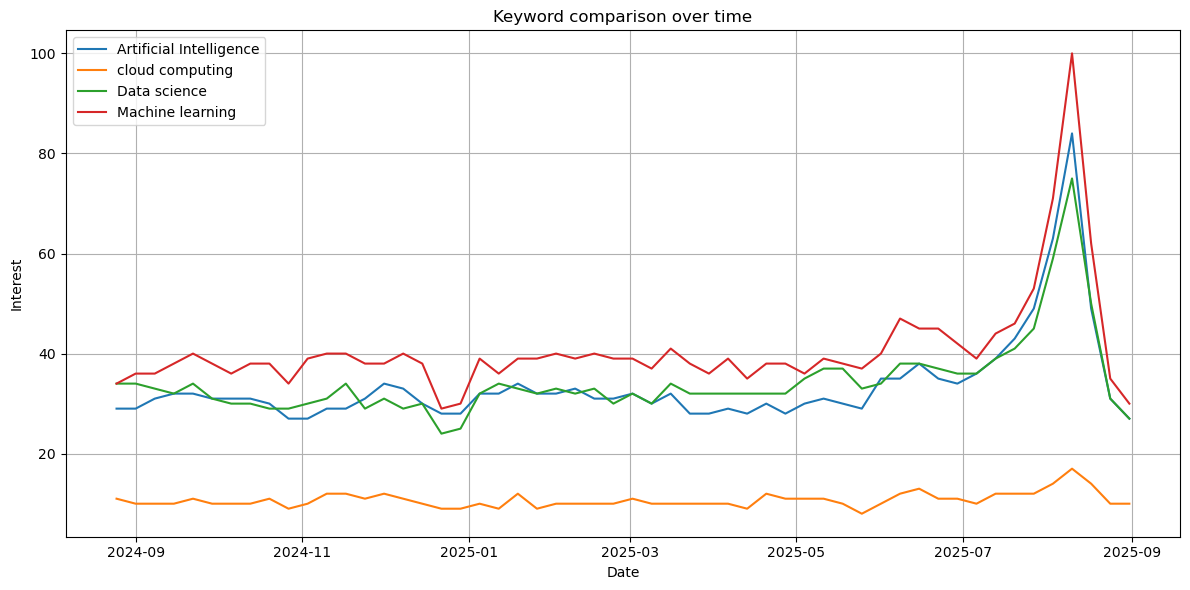

In [31]:
compare_df=pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)

plt.title("Keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()